In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
class LinearRegression:
    def __init__(self, inputs, targets, learning_rate=0.01):
        w_shape = list(inputs.shape)[::-1]
        w_shape[0] += 1
        self.weights = np.random.randn(*w_shape)
        self.features  = np.c_[ np.ones((len(inputs), 1)), inputs ]
        self.targets = targets

        self.learning_rate = learning_rate

        self.x_axis = [ ]
        self.y_axis = [ ]

    def model(self):
        return np.matmul(self.features, self.weights)

    def loss(self):
        return np.sum(np.square(self.model() - self.targets)) / 2

    def train(self, epochs):
        for epoch in range(epochs):

            self.x_axis.append(len(self.x_axis) + epoch)
            self.y_axis.append(self.loss())

            gradient = np.matmul(self.features.T, (self.model() - self.targets))

            self.weights -= self.learning_rate * gradient

    def draw(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.set_title('Linear Regression Loss/Time')
        ax1.set_ylabel('LOSS : J(A)')
        ax1.set_xlabel('EPOCH')
        ax1.plot(self.x_axis, self.y_axis, linestyle='dashed', color='#6ffc03')

    def get_equation(self):
        eqn = []
        coefficients = self.weights.flatten()
        for term in range(len(coefficients)):
            coeff = str("%.2f" % coefficients[term])
            X = '(' + coeff + ' x X' + str(term) + ')'
            eqn.append(X)
        return 'y = ' + ' + '.join(eqn)

    def test(self, inputs):
        features = np.c_[ np.ones((len(inputs), 1)), inputs ]
        model = np.matmul(features, self.weights)
        return [(inputs[i].tolist(), "%.2f" % model[i]) for i in range(len(model))]


In [58]:
X = np.random.randn(100, 1)
y = 3 * X + 4

In [59]:
model = LinearRegression(X, y)

In [75]:
model.train(10)

In [77]:
model.loss()

3.673133589935336e-28

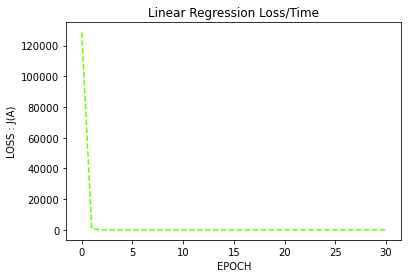

In [78]:
model.draw()